In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

0.04


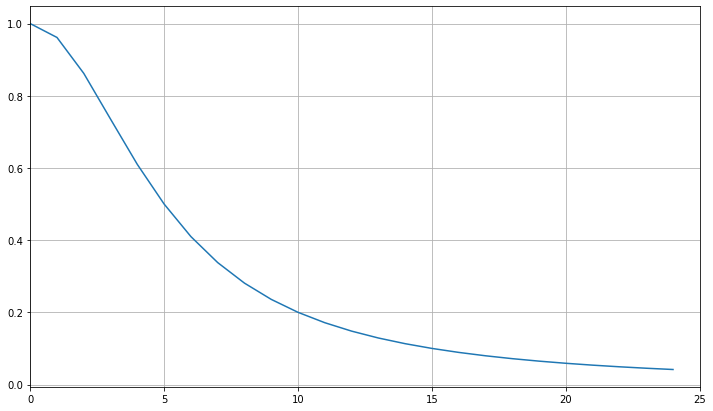

In [38]:
n=16
gamma=lambda x:1/(x)
betta = lambda x,y: 1/(1+x*y*y)

x = np.arange(n)
print(1/25)
fig = plt.figure(figsize=(12,7))
plt.plot(betta(gamma(25),np.arange(25)))
#plt.plot(betta(gamma(100),np.arange(100)))
plt.xlim((0,25))
plt.grid()
plt.show()

In [39]:
0.1*betta(gamma(25),10)

0.020000000000000004

In [199]:
np.set_printoptions(suppress=True)

def getData(name:str,met:str,problemas:list[list[int]])->tuple[list[float],list[float]]:
    problems = problemas[0]
    alg = problemas[1]
    lst1=[]
    error1=[]
    for p in problems:
        for a in alg:
            path="Results/P"+str(p)+"A"+str(a)+"/"+met+"/"
            data = np.array(pd.read_csv(path+name+".csv",sep=" ",header=None))
            h1 = data
            h1[:,0] = ((1-h1[:,0])/h1[:,0])*100
            
            mean1 = np.mean(h1,axis=0) #Promedio total
            
            var1 = (np.std(h1,axis=0)/np.sqrt(np.size(h1)))
            error1.append(var1)
            lst1.append(mean1)
    return (lst1,error1)

def CreateDataMean(names:list[str],met:str,problemas:list[list[int]]):
    g1=[]
    e1=[]
    for nm in names:
        lst1,err1 = getData(nm,met,problemas)
        g1.append(lst1)
        e1.append(err1)
    return (g1,e1)

def GetParam(ix:int,names:list[str],met:str,problemas:list[list[int]]):
    lst1 = []
    err1=[]
    g1,e1 =CreateDataMean(names=names,met=met,problemas=problemas)

    for i in np.arange(len(g1[0])):
        aux = []
        er1=[]
        for j in np.arange(len(g1)):
            aux.append(g1[j][i][ix])
            er1.append(e1[j][i][ix])
        err1.append(er1)
        lst1.append(aux)
    return lst1,err1

def PlotBar(algs:list,err1:list,names:list[str],title:str):
    yname="Error medio relativo (%)"
    X=np.arange(len(names))
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(X+0, algs,color='blue',width=0.35,label="DBLF",yerr=err1, ecolor='black', capsize=10)
    ax.set_title(label=title,fontdict={"fontsize":12})
    ax.set_ylabel(yname,{"fontsize":14})
    ax.legend(prop={"size":12})
    plt.xticks(ticks=X,labels=names,fontsize=14)
    ax.grid(visible=True,axis="y")
    fig.tight_layout()

In [245]:
namesHAG = ['HAG']
pathAG=["c2HAG"]
namesABC=['DABC']
pathABC=["DABC"]

namesFFA=['DFFA',"EDFFA","EDFFA(C1)"]


In [246]:
nms:list[str] =["HAG","DABC","c1EDFFA"]



In [247]:
pathFFA=["c2EDFFA"]

problm=[[3],[2]]
algsNm="P"+str(problm[0][0])+"A"+str(problm[1][0])

ag,agerr = GetParam(ix=0,names=pathAG,met="AG",problemas=problm)
ffa,ffaerr=GetParam(ix=0,names=pathFFA,met="FFA",problemas=problm)
dabc,dabcaerr=GetParam(ix=0,names=pathABC,met="ABC",problemas=problm)


In [239]:
dabc,dabcaerr

([[4.014306995939077, 3.7888074859819403]],
 [[0.951477040150612, 1.0323444711140404]])

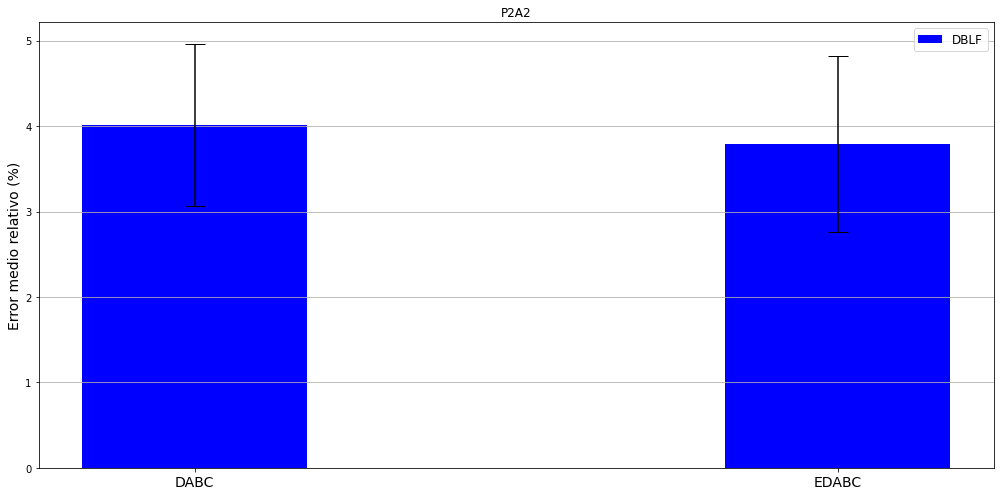

In [240]:
for i in np.arange(len(dabc)):
    PlotBar(dabc[i],dabcaerr[i],["DABC","EDABC"],algsNm)

In [248]:
ag[0].append(ffa[0][0])
ag[0].append(dabc[0][0])
ag

[[0.9778664809352401, 0.5479157756393213, 3.9793787779633165]]

In [249]:
agerr[0].append(ffaerr[0][0])
agerr[0].append(dabcaerr[0][0])
agerr

[[0.22550611634785123, 0.21437414259214, 0.6526916012584278]]

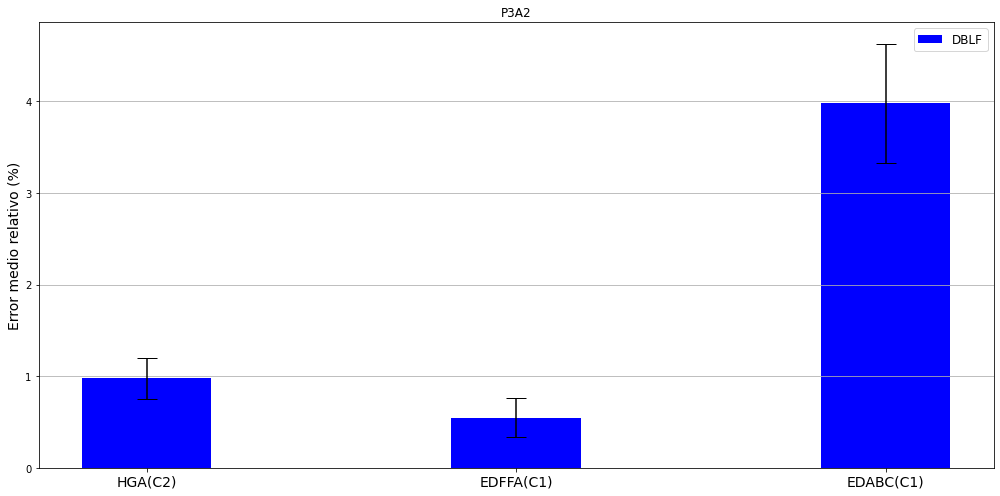

In [250]:
for i in np.arange(len(ag)):
    PlotBar(ag[i],agerr[i],["HGA(C2)","EDFFA(C1)","EDABC(C2)"],algsNm)